<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

# Grouping with Pandas (Code Along)

***

Week 2 | Lesson 4.1

***Titanic Dataset***

I dropped Ticket, Cabin, Age have missing values, and/or "letters NUMBERS", no the best practice at all, but we want to concentrate on implementing group by


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
#### Read the dataset

path_to_file = '/Users/Javier/Desktop/DSI-2-TEACH/DSI-SF/datasets/titanic/titanic_clean.csv' ## Change it to your path
titanic = pd.read_csv(path_to_file)
titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S


In [3]:
## describe the dataset
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,712.0,448.589888,258.683191,1.00,222.75,445.00000,677.25,891.0000
Survived,712.0,0.404494,0.491139,0.00,0.00,0.00000,1.00,1.0000
Pclass,712.0,2.240169,0.836854,1.00,1.00,2.00000,3.00,3.0000
Age,712.0,29.642093,14.492933,0.42,20.00,28.00000,38.00,80.0000
SibSp,712.0,0.514045,0.930692,0.00,0.00,0.00000,1.00,5.0000
Parch,712.0,0.432584,0.854181,0.00,0.00,0.00000,1.00,6.0000
Fare,712.0,34.567251,52.938648,0.00,8.05,15.64585,33.00,512.3292


In [4]:
## How many rows and columns does the dataset has
print titanic.shape
## Lets find the type and missing values (if any)
print titanic.info()


(712, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 55.7+ KB
None


Now we have a **"cleaner"** version of our dataset, but we can not infer anything yet.

**Here is where group by comes handy**

Identify the parameters we need

***titanic.groupby?***

***Notice***
1. Groups don't really print anything interesting on their own df.groupby([var_1])
2. When assign to a variable/new data frame the var is a SeriesGroupBy object
   


In [5]:
## Group the dataset by Sex (by it own we don't get an output) 
print titanic.groupby(["Sex"])
print "\n-----\n"

## Group the data set by Sex and the Age Key/column/feature group
## and assign it to a variable called "group"

group = titanic['Age'].groupby(titanic['Sex'])
# or  
group = titanic.groupby(['Sex'])['Age']

print group
print type(group)


-----

<class 'pandas.core.groupby.SeriesGroupBy'>


**Groups can be operated on in aggregate and they take numpy functions**

Lets take the group created before and calculate, mean, median, count and max

In [6]:
print group.mean()
print "\n===\n"
print group.median()
print '\n====\n'
print group.count()
print '\n====\n'
print group.max()

Sex
female    27.745174
male      30.726645
Name: Age, dtype: float64

===

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

====

Sex
female    259
male      453
Name: Age, dtype: int64

====

Sex
female    63.0
male      80.0
Name: Age, dtype: float64


**A quick note about two popular aggregates that seem the same, but are not!**

.count() vs .size()

.count() gives us counts of record rows repeated over variable columns

.size() gives us counts as series, not repeated values over column variables

In [7]:
## Use size() to find the number of observations Per Class, called it tit_class, check type
tit_class = titanic.groupby(['Pclass']).size()

print tit_class
print "\n===\n"
print type(tit_class)



Pclass
1    184
2    173
3    355
dtype: int64

===

<class 'pandas.core.series.Series'>


In [8]:
## Use count() to find the number of survived and not survived passengers, called it tit_class_ct, check type
tit_class_ct = titanic.groupby(['Pclass']).count()
tit_class_ct

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,,,,,,,,,
1,184,184,184,184,184,184,184,184,184
2,173,173,173,173,173,173,173,173,173
3,355,355,355,355,355,355,355,355,355


In [9]:
## What is the type of tit_class_ct
print type(tit_class_ct)

<class 'pandas.core.frame.DataFrame'>


With a Pandas **group object**,

.count(), .size(), .sum(), .mean(), .std() are some very common ways to apply calcuation operations in aggregate to subsets of your data.

[Pandas .groupby docs](http://pandas.pydata.org/pandas-docs/version/0.15.2/groupby.html)

### Method 1
    (the one that makes more sense to me)

df.groupby(['var_1', 'var_2', ..........])[[ "what I want to know" ]].what_metric_I_want( )

In [10]:
## Use approach 1 to find the average age of passengers group by Sex and survivorship
titanic.groupby( ['Sex', 'Survived'] )[ ['Age'] ].mean()

Age
Sex    Survived           
female 0         25.046875
       1         28.630769
male   0         31.618056
       1         27.276022

### Method 2
df.['what I want to know'].groupby(['var_1', 'var_2', ..........]).what_metric_I_want( )

In [11]:
## Use approach 2 to find the average age of passengers group by Sex and survivorship 
titanic['Age'].groupby( [ titanic['Sex'], titanic['Survived'] ] ).mean()

Sex     Survived
female  0           25.046875
        1           28.630769
male    0           31.618056
        1           27.276022
Name: Age, dtype: float64

In [12]:
## Use your group by from before by now add another [] to the section [what I want to know], 
## pass the column names to a list
## print the index

titanic[['Age']].groupby( [ titanic['Sex'], titanic['Survived'] ] ).mean().index

MultiIndex(levels=[[u'female', u'male'], [0, 1]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=[u'Sex', u'Survived'])

### Hierarchical Index
You can remove hierarchical index using reset_index() or passing as_index=False, inside the groupby

My preference is reset_index()

In [13]:
## Find the average age of passengers group by Sex and survivorship 
    ## Reset the index, use the apply function => pass np.FUNCTION, rename Age as Aver_Age (.add_prefix())
titanic.groupby( ['Sex', 'Survived'] )[ ['Age'] ].apply(np.mean).add_prefix('Aver_').reset_index()


,Sex,Survived,Aver_Age
0,female,0,25.046875
1,female,1,28.630769
2,male,0,31.618056
3,male,1,27.276022


In [14]:
## Using the previous group by example, pass the column names to a list
titanic.groupby( ['Sex', 'Survived'] )[ ['Age'] ].apply(np.mean).add_prefix('Aver_').reset_index().columns.tolist()

['Sex', 'Survived', 'Aver_Age']

In [15]:
## Reset Index using as_index=False
titanic.groupby( ['Sex', 'Survived'], as_index=False)[ ['Age'] ].mean()

,Sex,Survived,Age
0,female,0,25.046875
1,female,1,28.630769
2,male,0,31.618056
3,male,1,27.276022


In [16]:
### Lets find the Number/Count of Passengers that did not survived by sex and class
    ## use a mask, and as_index==False

titanic[(titanic['Survived']==0)].groupby(['Survived','Pclass', 'Sex']).size().reset_index()

,Survived,Pclass,Sex,0
0,0,1,female,3
1,0,1,male,61
2,0,2,female,6
3,0,2,male,84
4,0,3,female,55
5,0,3,male,215


In [17]:
### Lets find the Average Fare passengers paid by Class
    ## use apply
titanic.groupby(['Pclass', 'Sex', 'Survived'])[['Fare']].apply(np.mean).add_prefix('Aver_').reset_index()

,Pclass,Sex,Survived,Aver_Fare
0,1,female,0,110.604167
1,1,female,1,108.545261
2,1,male,0,65.229369
3,1,male,1,80.160735
4,2,female,0,18.250000
5,2,female,1,22.277635
6,2,male,0,20.933879
7,2,male,1,22.116947
8,3,female,0,18.474320
9,3,female,1,12.834043


## Let's dive into the dataset, exploring/creating subsets
![](http://www.w3resource.com/sql/sql-root-images/group-by.gif)

### Subsets

**recall:**

df_1 = df.groupby( ['var_1', 'var_2', ..] )[ ['var_3'] ].apply(np.mean).add_prefix_('Something_').reset_index()


[apply function documentation](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.apply.html)

df['column_name'] = df['column_name'].apply(lambda x: round(x, 0)).astype(int)




In [18]:
## Create a subset called titanic_1 that shows the Average age of passengers by sex and survivorship
    ##Rename the column of interest as 'Round_ave_', round this column, the final number is an integer with no decimal points 
## Hint apply(lambda)

titanic_1 = titanic.groupby( ['Sex', 'Survived'] )[ ['Age'] ].apply(np.mean).add_prefix('Round_ave_').reset_index()
titanic_1['Round_ave_Age'] = titanic_1['Round_ave_Age'].apply(lambda x: round(x, 0)).astype(int)
titanic_1

,Sex,Survived,Round_ave_Age
0,female,0,25
1,female,1,29
2,male,0,32
3,male,1,27


In [19]:
## Is there a difference in average Fare price paid by sex, port of embarked and P class?
titanic_sub = titanic.groupby(['Sex', 'Embarked', 'Pclass'] )[ ['Fare'] ].apply(np.mean).add_prefix('Aver_').reset_index()
titanic_sub

,Sex,Embarked,Pclass,Aver_Fare
0,female,C,1,117.490900
1,female,C,2,25.268457
2,female,C,3,14.665887
3,female,Q,1,90.000000
4,female,Q,2,12.350000
5,female,Q,3,10.601670
6,female,S,1,101.381345
7,female,S,2,21.744697
8,female,S,3,16.823904
9,male,C,1,98.488314


In [20]:
## By Sex, Pclass and Survived, lets find the 75 quantile based on Age
titanic_sub_1 = titanic.groupby( ['Sex', 'Pclass','Survived'] )[ ['Age'] ].quantile(0.75).add_prefix('75Q_').reset_index()
titanic_sub_1['75Q_Age'] = titanic_sub_1['75Q_Age'].apply(lambda x: round(x, 0)).astype(int)
titanic_sub_1

,Sex,Pclass,Survived,75Q_Age
0,female,1,0,38
1,female,1,1,44
2,female,2,0,43
3,female,2,1,35
4,female,3,0,31
5,female,3,1,27
6,male,1,0,56
7,male,1,1,48
8,male,2,0,39
9,male,2,1,32


In [21]:
## How many of them survived or not by port of Embark
    ## Lets use the aggregate function and define a list of tuples that  
    ## takes a np.STATS function and a name (name, np.STATS)

func_tuples = [('Mean', np.mean), ('Var', np.var), ('Std', np.std), ('Count', 'count')]
titanic_sub_2 = titanic.groupby( ['Embarked','Survived', "Pclass"] )[ ['Age', 'Fare'] ].agg(func_tuples).reset_index()
titanic_sub_2

Embarked Survived Pclass        Age                               \
                                  Mean         Var        Std Count   
0         C        0      1  43.380952  270.347619  16.442251    21   
1         C        0      2  29.500000   19.416667   4.406435     7   
2         C        0      3  26.065217  103.643281  10.180534    23   
3         C        1      1  35.905660  164.664006  12.832147    53   
4         C        1      2  16.875000  106.125000  10.301699     8   
5         C        1      3  13.940000  101.322153  10.065891    18   
6         Q        0      1  44.000000         NaN        NaN     1   
7         Q        0      2  57.000000         NaN        NaN     1   
8         Q        0      3  28.083333  354.389706  18.825241    18   
9         Q        1      1  33.000000         NaN        NaN     1   
10        Q        1      2  30.000000         NaN        NaN     1   
11        Q        1      3  19.500000   28.300000   5.319774     6   
12        S        0      1  43.845238  227.005952  15.066717    42   
13        S        0      2  33.603659  152.597147  12.353022    82   
14        S        0      3  26.484716  142.871476  11.952886   229   
15        S        1      1  34.529091  208.674008  14.445553    66   
16        S        1      2  26.822027  227.108394  15.070116    74   
17        S        1      3  22.737705  152.296721  12.340856    61   

          Fare                                  
          Mean           Var         Std Count  
0    80.791862   3643.512744   60.361517    21  
1    26.899400    112.322356   10.598224     7  
2     9.910517     16.349210    4.043416    23  
3   119.124611  13143.848454  114.646624    53  
4    26.735425    159.317635   12.622109     8  
5    13.234728     23.363298    4.833560    18  
6    90.000000           NaN         NaN     1  
7    12.350000           NaN         NaN     1  
8    14.436111     94.229706    9.707199    18  
9    90.000000           NaN         NaN     1  
10   12.350000           NaN         NaN     1  
11    7.815283      0.013871    0.117773     6  
12   60.099402   3401.115519   58.319084    42  
13   20.332927    234.913115   15.326876    82  
14   13.409659    108.858419   10.433524   229  
15   83.127968   3490.480879   59.080292    66  
16   21.897297    114.809308   10.714911    74  
17   13.979164    133.841741   11.568999    61

## What's going on here!?

_(visually)_

In [22]:
func_tuples = [('Mean', np.mean), ('Var', np.var), ('Std', np.std)]
titanic_sub_2 = titanic.groupby( ['Embarked','Survived', 'Sex'] )[ ['Age', 'Fare'] ].agg(func_tuples).reset_index()
titanic_sub_2

Embarked Survived     Sex        Age                              Fare  \
                                   Mean         Var        Std       Mean   
0         C        0  female  25.583333  300.441667  17.333253  16.963200   
1         C        0    male  34.744444  211.120707  14.529993  44.690836   
2         C        1  female  28.645455  247.596507  15.735200  86.807425   
3         C        1    male  29.725833  235.833582  15.356874  82.971021   
4         Q        0  female  28.100000   73.050000   8.546929  13.375000   
5         Q        0    male  31.066667  477.745238  21.857384  19.688333   
6         Q        1  female  21.571429   52.285714   7.230886  20.213100   
7         Q        1    male  29.000000         NaN        NaN   7.750000   
8         S        0  female  24.698113  189.137881  13.752741  24.315960   
9         S        0    male  31.176667  182.099119  13.494411  19.911803   
10        S        1  female  28.996241  182.880668  13.523338  44.254135   
11        S        1    male  26.386029  290.097609  17.032252  30.496690   

                              
             Var         Std  
0      33.231056    5.764638  
1    2875.725463   53.625791  
2    8195.446699   90.528706  
3   18423.500309  135.733195  
4      89.937500    9.483538  
5     466.927915   21.608515  
6     949.835899   30.819408  
7            NaN         NaN  
8     762.594876   27.615120  
9     736.249011   27.133909  
10   2700.389715   51.965274  
11    994.135200   31.529910

## 2-5 minutes try to do this with a partner:

1. Are there any other numpy functions you find them helpful, if so apply them to a subset 

3. How might you use this in the future?
4. Can you find the name, sex and port of embark of the oldest survival and non-survival?


More useful info about groups and selection in the [Pandas Cookbook docs](http://pandas.pydata.org/pandas-docs/stable/cookbook.html)

In [23]:
## Use Wild Car describe on a data frame group by Survived , Sex and Age
titanic.groupby(['Survived', 'Pclass'])[["Age"]].describe()

Age
Survived Pclass                  
0        1      count   64.000000
                mean    43.695312
                std     15.284243
                min      2.000000
                25%     31.000000
                50%     45.250000
                75%     55.250000
                max     71.000000
         2      count   90.000000
                mean    33.544444
                std     12.151581
                min     16.000000
                25%     25.000000
                50%     30.500000
                75%     39.000000
                max     70.000000
         3      count  270.000000
                mean    26.555556
                std     12.334882
                min      1.000000
                25%     19.000000
                50%     25.000000
                75%     33.000000
                max     74.000000
1        1      count  120.000000
                mean    35.124333
                std     13.654375
                min      0.920000
                25%     24.000000
                50%     35.000000
                75%     45.000000
                max     80.000000
         2      count   83.000000
                mean    25.901566
                std     14.837787
                min      0.670000
                25%     17.500000
                50%     28.000000
                75%     34.000000
                max     62.000000
         3      count   85.000000
                mean    20.646118
                std     11.995047
                min      0.420000
                25%     14.000000
                50%     22.000000
                75%     29.000000
                max     63.000000

In [46]:
pwd

u'/Users/Javier/Desktop/DSI-2-TEACH/DSI-SF/curriculum/week-2/4.1-grouping-with-pandas-plus-lab/slides'

In [43]:
## Def function that return the top 10 passengers that paid the highest Fare 
## Use 5 as the base number for rows
def top_fct(df, num=5, column="Fare"):
    return df.sort_index(by=column)[-num:]

top_fct(titanic, num=6)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
273,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,263.0000,S
350,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,263.0000,S
23,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,263.0000,S
207,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,C
536,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,C
586,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,C


In [25]:
## Pass the function to a datframe group by "Survived" and Sex and find their age
titanic.groupby(['Survived', 'Sex']).apply(top_fct, num=5, column="Age")

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


PassengerId  Survived  Pclass  \
Survived Sex                                         
0        female 289          363         0       3   
                103          133         0       3   
                585          737         0       3   
                141          178         0       1   
                615          773         0       2   
         male   591          746         0       1   
                90           117         0       3   
                392          494         0       1   
                73            97         0       1   
                677          852         0       3   
1        female 215          269         1       1   
                155          196         1       1   
                292          367         1       1   
                384          484         1       3   
                220          276         1       1   
         male   360          450         1       1   
                511          648         1       1   
                464          588         1       1   
                450          571         1       2   
                497          631         1       1   

                                                                 Name     Sex  \
Survived Sex                                                                    
0        female 289                   Barbara, Mrs. (Catherine David)  female   
                103    Robins, Mrs. Alexander A (Grace Charity Laury)  female   
                585           Ford, Mrs. Edward (Margaret Ann Watson)  female   
                141                        Isham, Miss. Ann Elizabeth  female   
                615                                 Mack, Mrs. (Mary)  female   
         male   591                      Crosby, Capt. Edward Gifford    male   
                90                               Connors, Mr. Patrick    male   
                392                           Artagaveytia, Mr. Ramon    male   
                73                          Goldschmidt, Mr. George B    male   
                677                               Svensson, Mr. Johan    male   
1        female 215     Graham, Mrs. William Thompson (Edith Junkins)  female   
                155                              Lurette, Miss. Elise  female   
                292  Warren, Mrs. Frank Manley (Anna Sophia Atkinson)  female   
                384                            Turkula, Mrs. (Hedwig)  female   
                220                 Andrews, Miss. Kornelia Theodosia  female   
         male   360                    Peuchen, Major. Arthur Godfrey    male   
                511               Simonius-Blumer, Col. Oberst Alfons    male   
                464                  Frolicher-Stehli, Mr. Maxmillian    male   
                450                                Harris, Mr. George    male   
                497              Barkworth, Mr. Algernon Henry Wilson    male   

                      Age  SibSp  Parch      Fare Embarked  
Survived Sex                                                
0        female 289  45.0      0      1   14.4542        C  
                103  47.0      1      0   14.5000        S  
                585  48.0      1      3   34.3750        S  
                141  50.0      0      0   28.7125        C  
                615  57.0      0      0   10.5000        S  
         male   591  70.0      1      1   71.0000        S  
                90   70.5      0      0    7.7500        Q  
                392  71.0      0      0   49.5042        C  
                73   71.0      0      0   34.6542        C  
                677  74.0      0      0    7.7750        S  
1        female 215  58.0      0      1  153.4625        S  
                155  58.0      0      0  146.5208        C  
                292  60.0      1      0   75.2500        C  
                384  63.0      0      0    9.5875        S  
                220  63.0      1      0   77.9583        S  
         mal

In [26]:
## For the "for loop" lovers: Grouped the data frame by class, print the class number and then print the df
## 'Class: %s' % grp
## 'DataFrame description: \n%s\n' % df.head()

for clas, df in titanic.groupby(['Pclass']):
    print 'Class: %s' % clas
    print 'DataFrame description: \n%s\n' % df.head()

Class: 1
DataFrame description: 
    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
5             7         0       1   
10           12         1       1   
20           24         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
5                             McCarthy, Mr. Timothy J    male  54.0      0   
10                           Bonnell, Miss. Elizabeth  female  58.0      0   
20                       Sloper, Mr. William Thompson    male  28.0      0   

    Parch     Fare Embarked  
1       0  71.2833        C  
3       0  53.1000        S  
5       0  51.8625        S  
10      0  26.5500        S  
20      0  35.5000        S  

Class: 2
DataFrame description: 
    PassengerId  Survived  Pclass                            

## 10 Minute Break!

# (basic) Plotting with Groups


In [27]:
# This is a reminder of what our dataframe looks like
titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S


In [28]:
titanic.groupby(["Pclass"]).size()

Pclass
1    184
2    173
3    355
dtype: int64

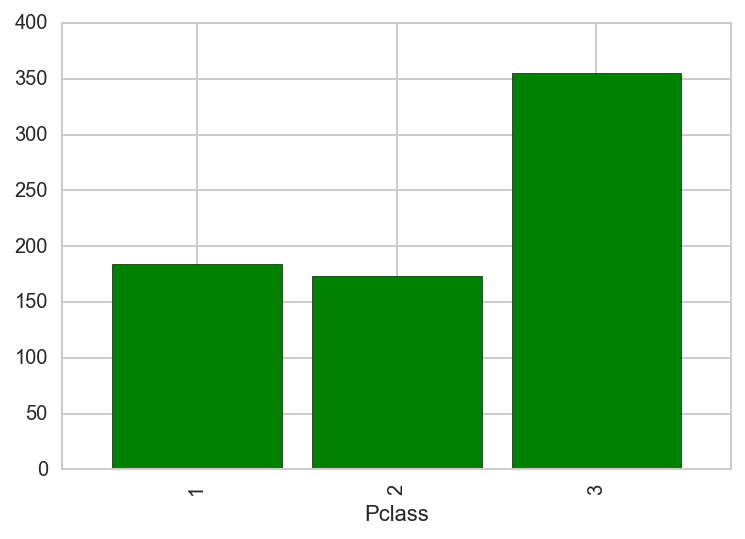

In [29]:
## Plot a kind='bar' of the number of Passengers by Pclass and Sex
    ## Does the graph look ok?
titanic.groupby("Pclass").size().plot(kind="bar", color="g", width=0.85)
plt.show()

### Groupby and graphs with more than one variable

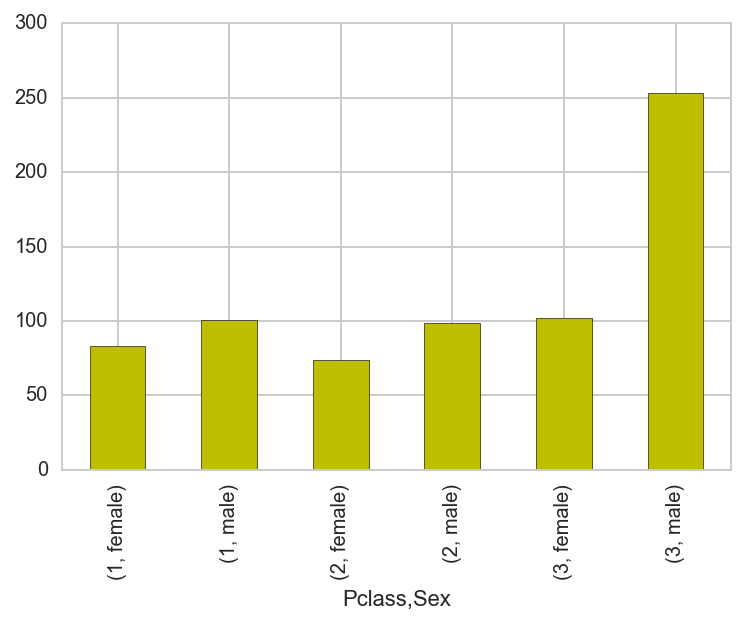

In [30]:
## Plot a kind='bar' of the data set group by Pclass and Sex, use .size()
titanic.groupby(['Pclass','Sex']).size().plot(kind="bar", color='y')
plt.show()

//anaconda/lib/python2.7/site-packages/pandas/tools/plotting.py:968: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


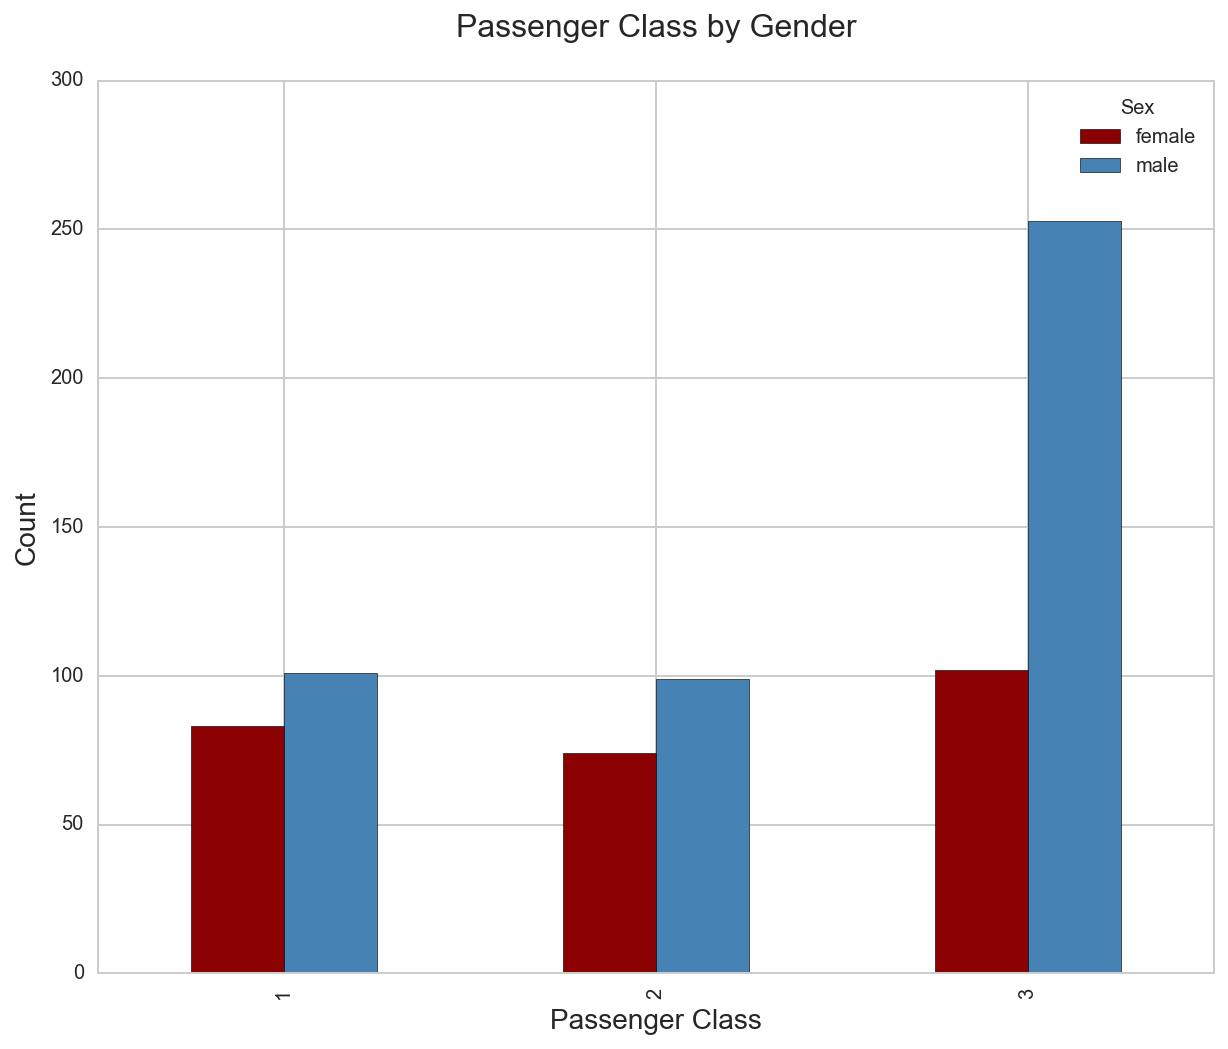

In [31]:
## Use the same code as before, make a kind='bar' graph, use unstack  => will pull-apart group values for easy display
    ## Class by Sex (Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd))
    ## .size().unstack(), colors=['darkred', 'steelblue']
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
titanic.groupby(['Pclass','Sex']).size().unstack().plot(kind="bar", 
                                                        colors=['darkred', 'steelblue'],
                                                        ax=ax)
plt.xlabel("Passenger Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title('Passenger Class by Gender\n', fontsize=16)
plt.show()

In [32]:
titanic.groupby(['Pclass','Survived','Sex'])[['Age']].size().reset_index()

,Pclass,Survived,Sex,0
0,1,0,female,3
1,1,0,male,61
2,1,1,female,80
3,1,1,male,40
4,2,0,female,6
5,2,0,male,84
6,2,1,female,68
7,2,1,male,15
8,3,0,female,55
9,3,0,male,215


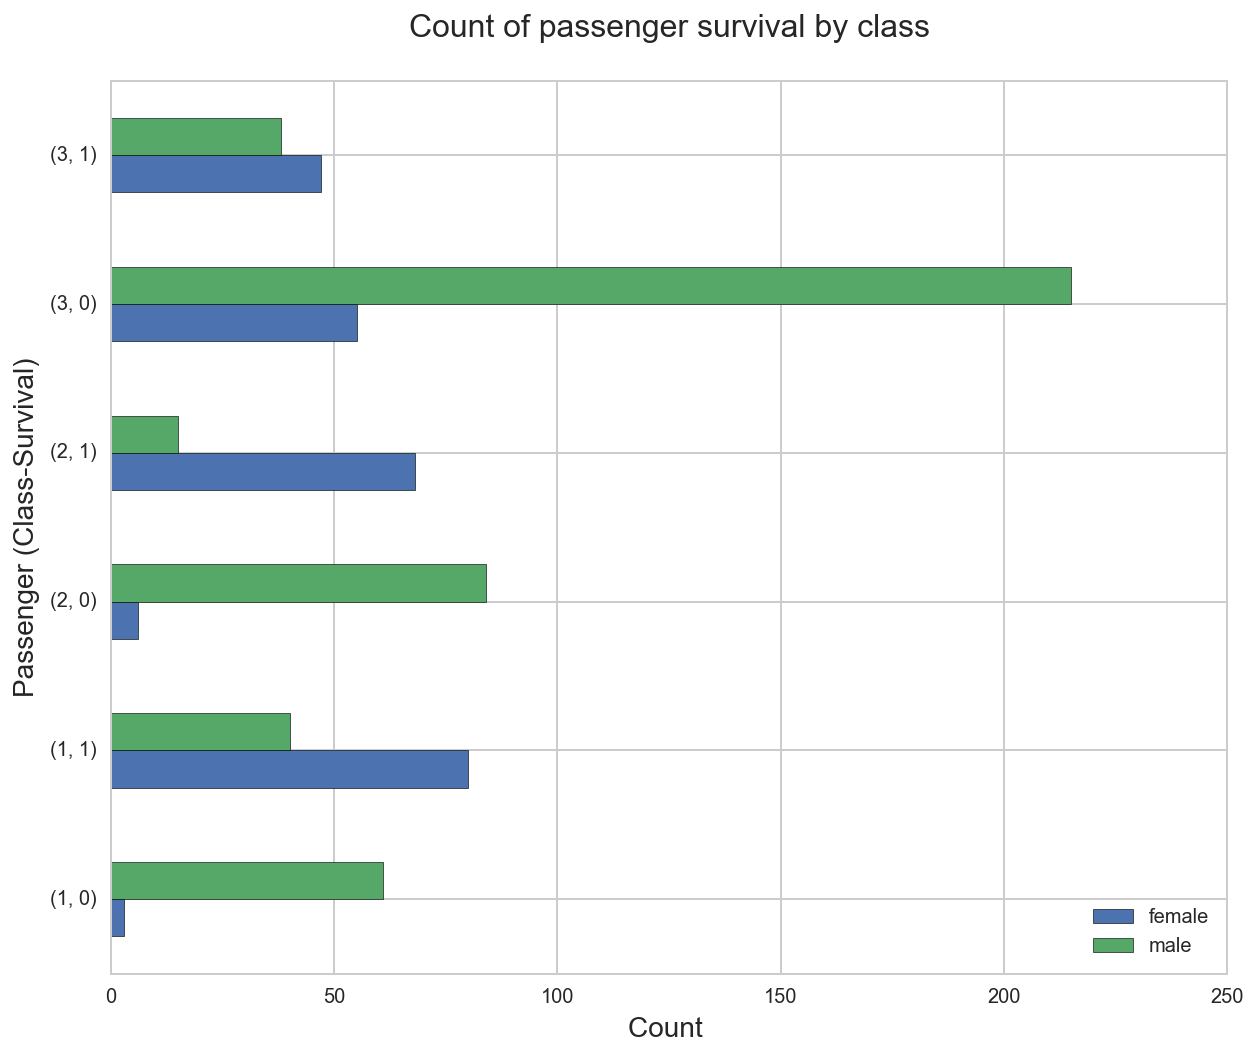

In [33]:
## Use the same code as before, make a kind='barh' graph, use unstack
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

titanic.groupby(['Pclass','Survived','Sex'])[['Age']].size().unstack().plot(kind="barh", ax=ax)

plt.xlabel("Count ", fontsize=14)
plt.ylabel("Passenger (Class-Survival)", fontsize=14)
plt.title('Count of passenger survival by class\n', fontsize=16)
plt.legend(loc='lower right')
plt.show()

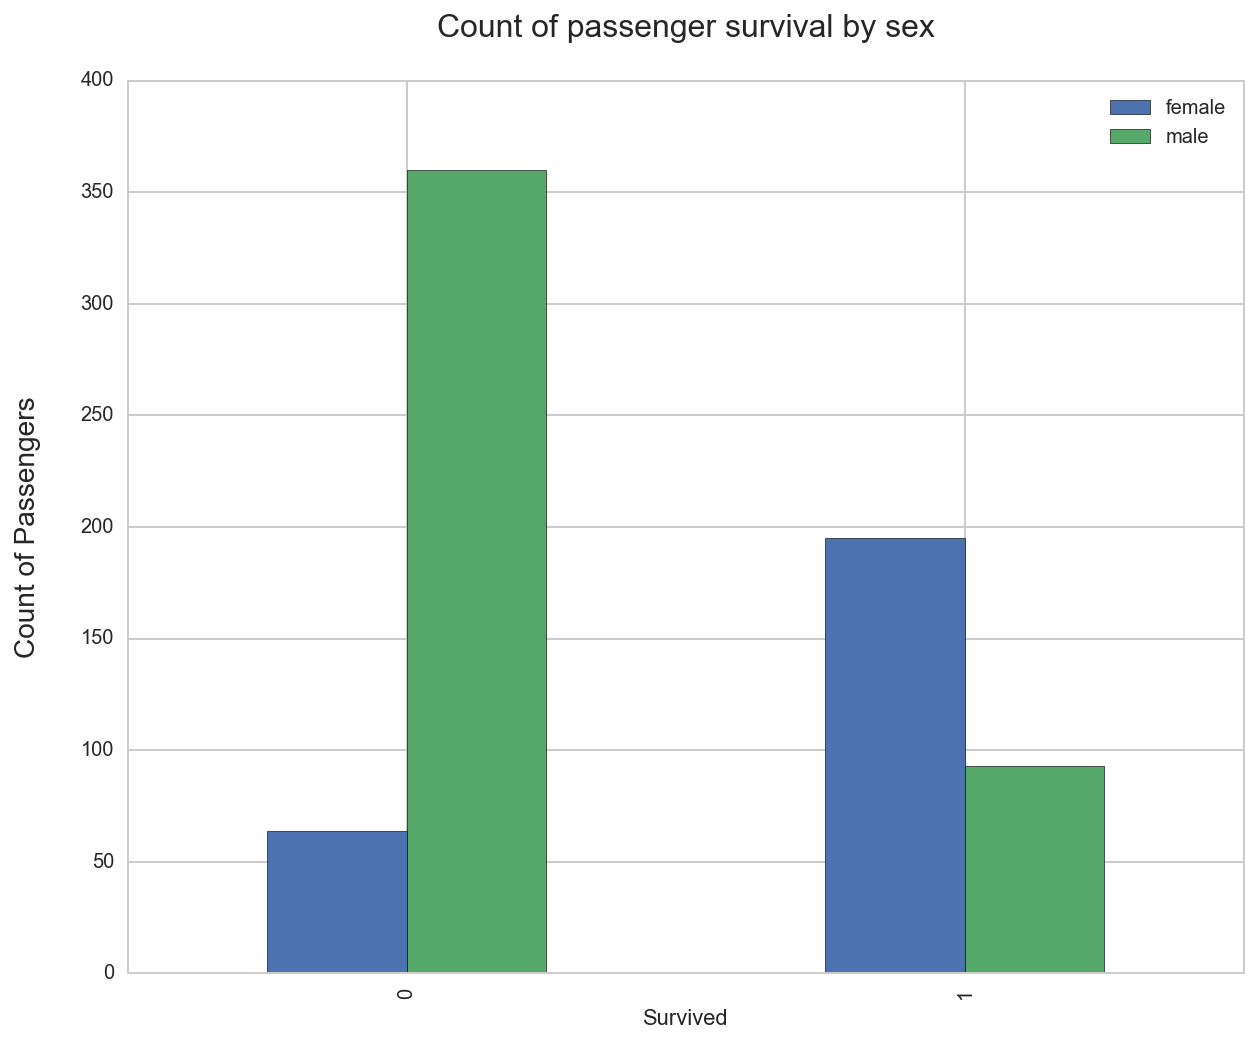

In [34]:
# Using unstack, create a kind='bar' that shows which group (men or women) survived the most

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
titanic.groupby(['Survived','Sex']).size().unstack().plot(kind="bar", ax=ax)

plt.ylabel("Count of Passengers\n", fontsize=14)
plt.title('Count of passenger survival by sex\n', fontsize=16)
plt.legend(loc='upper right')
plt.show()
plt.show()

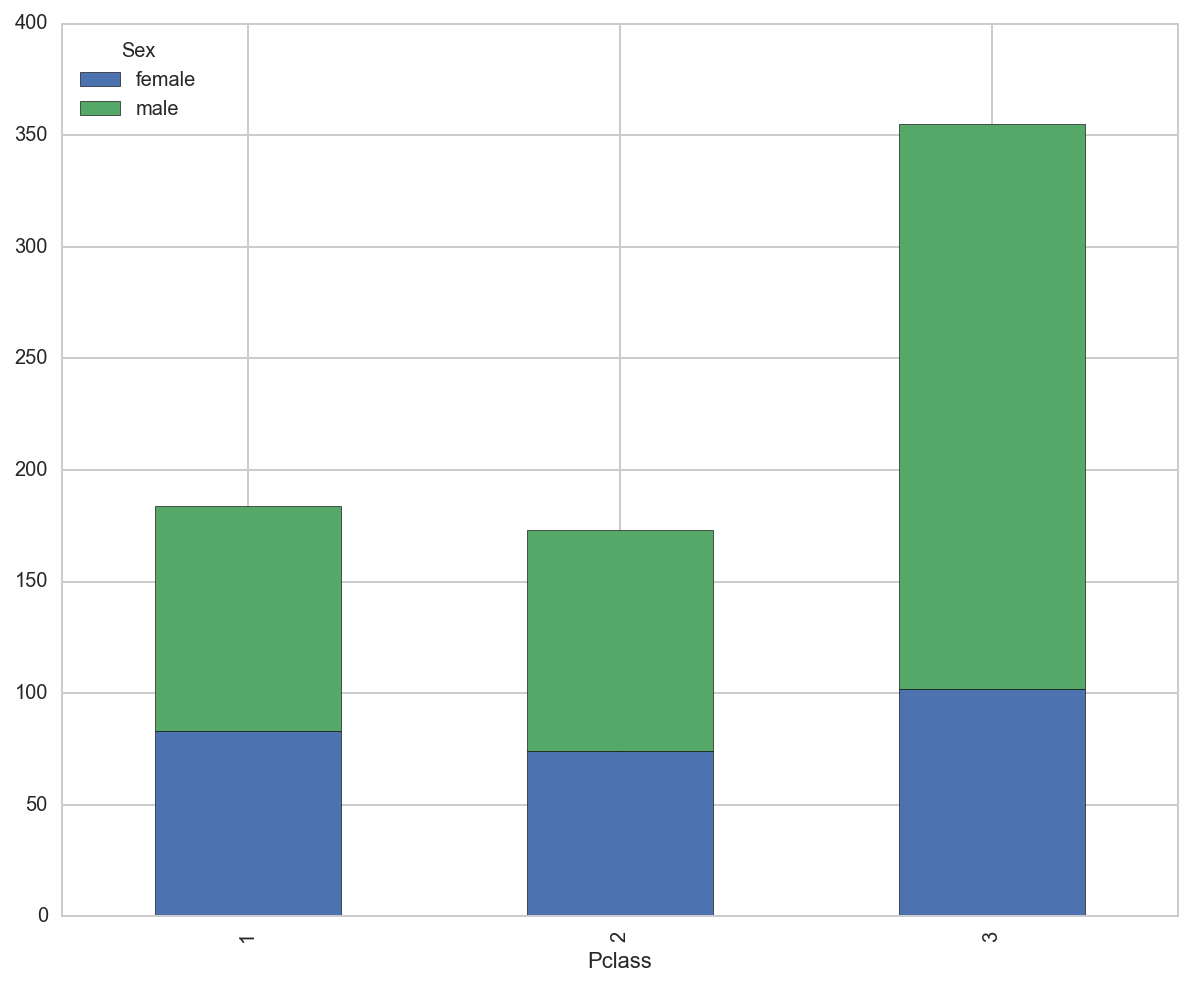

In [35]:
# Stacking isn't a bad choice for fewer categories but can look cluttery with lots of categories
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
titanic.groupby(['Pclass','Sex']).size().unstack().plot(kind="bar", stacked=True, ax=ax)
plt.show()


Bar charts are great for displaying quanitites with groups and understanding quantity / size within subsets.  This is only an "introduction".  There are many ways to plot things.

***List of options for graph***

‘bar’ or ‘barh’ for bar plots

‘hist’ for histogram

‘box’ for boxplot

‘kde’ or 'density' for density plots

‘area’ for area plots

‘scatter’ for scatter plots

‘hexbin’ for hexagonal bin plots

‘pie’ for pie plots

In [36]:
titanic.groupby( ['Sex','Embarked', 'Age'] )[ ['Survived'] ].size().reset_index().head(5)

,Sex,Embarked,Age,0
0,female,C,0.75,2
1,female,C,1.00,1
2,female,C,3.00,1
3,female,C,4.00,1
4,female,C,5.00,1


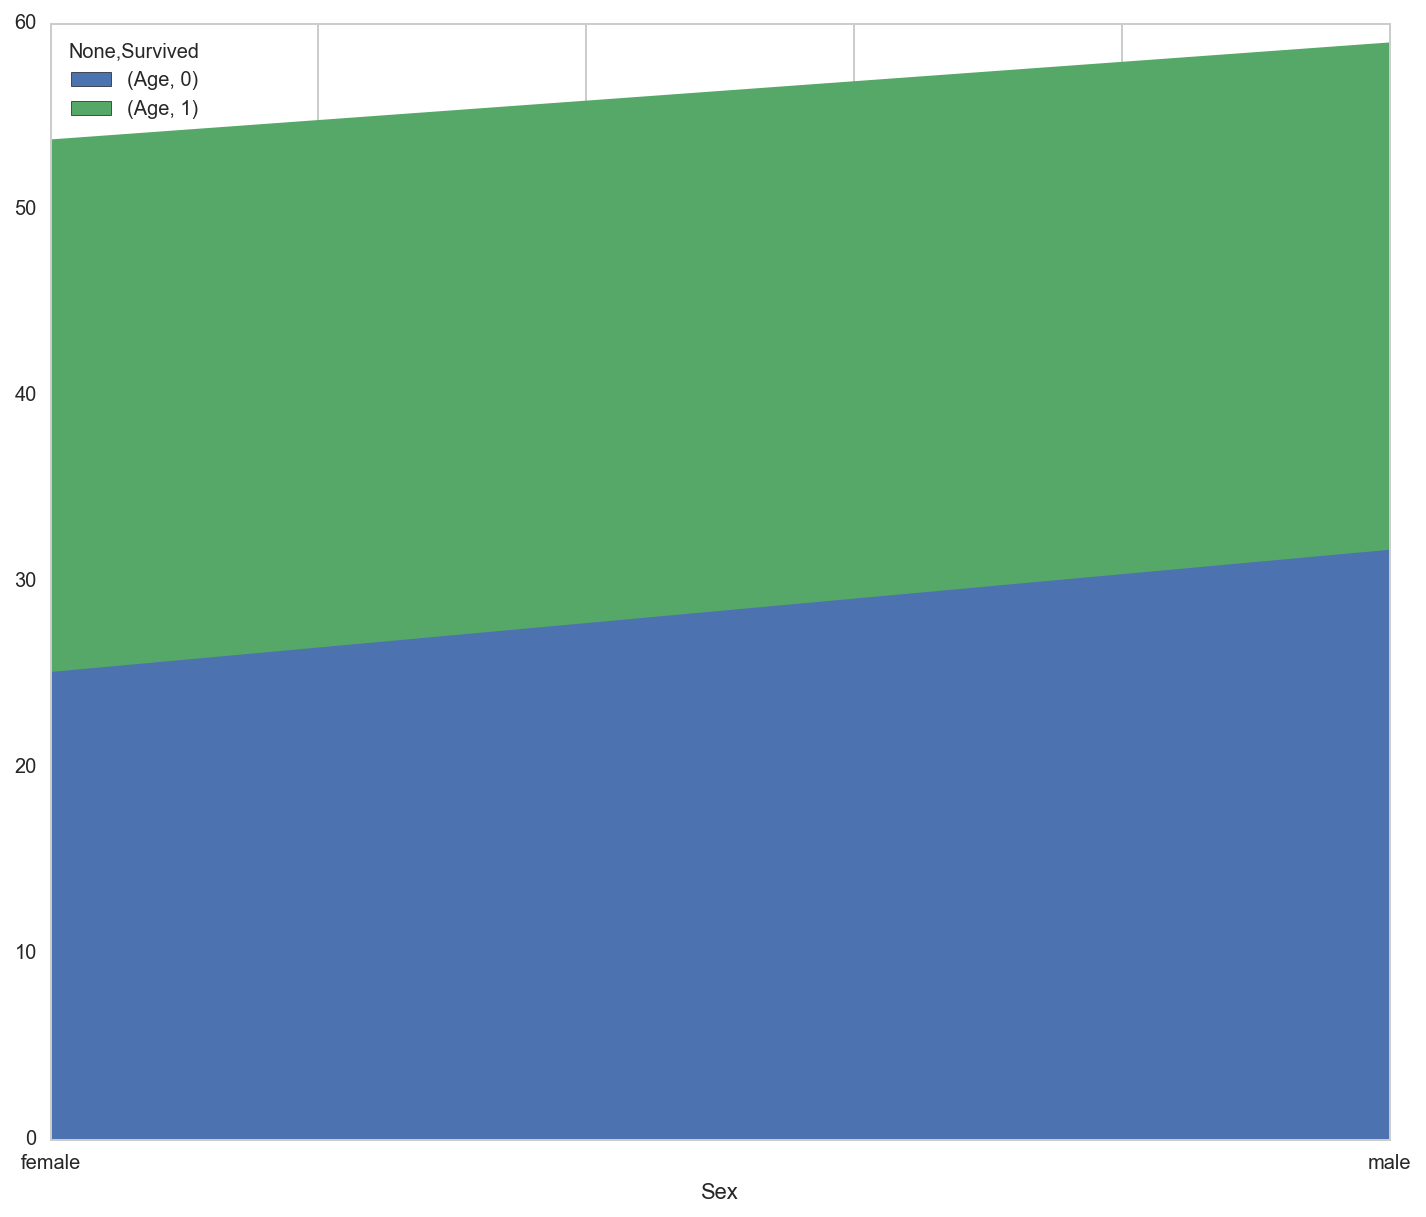

In [37]:
## Here is a graph that I hope you never use
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
titanic.groupby( ['Sex', 'Survived'] )[ ['Age'] ].mean().unstack().plot(kind="area", ax=ax)

plt.show()

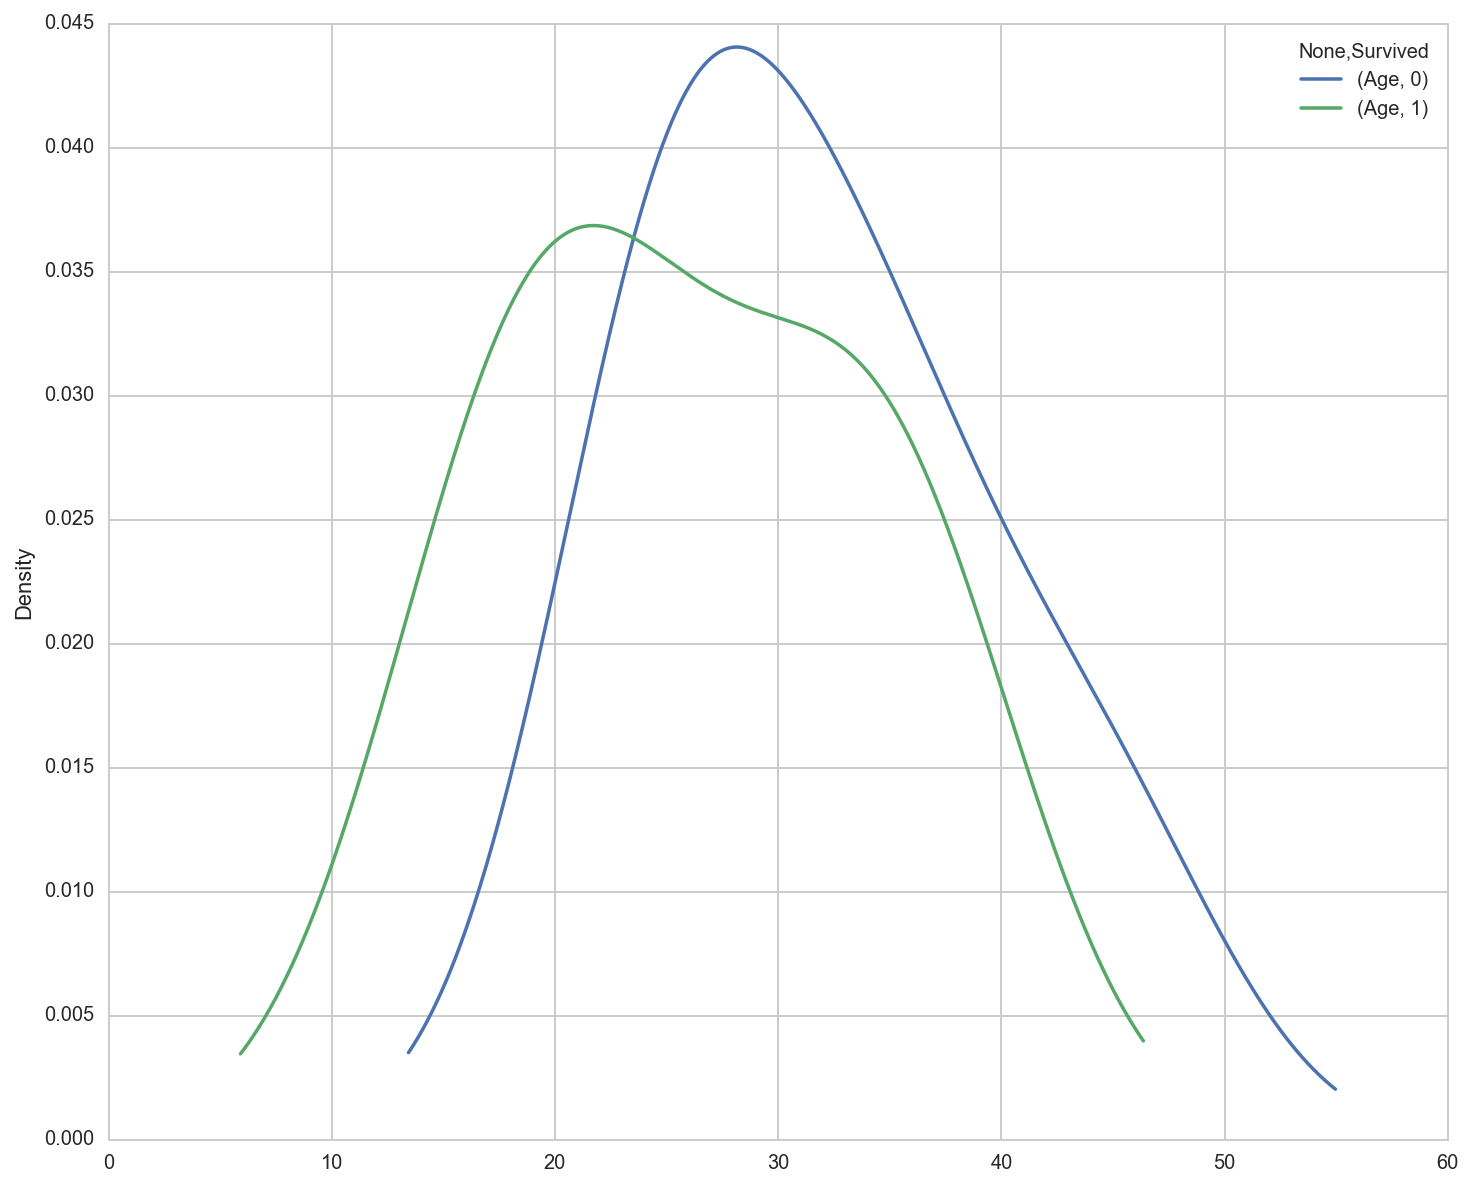

In [38]:
## Density Plot
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
titanic.groupby( ['Sex', 'Pclass','Survived'] )[ ['Age'] ].mean().unstack().plot(kind="kde", ax=ax)
plt.show()

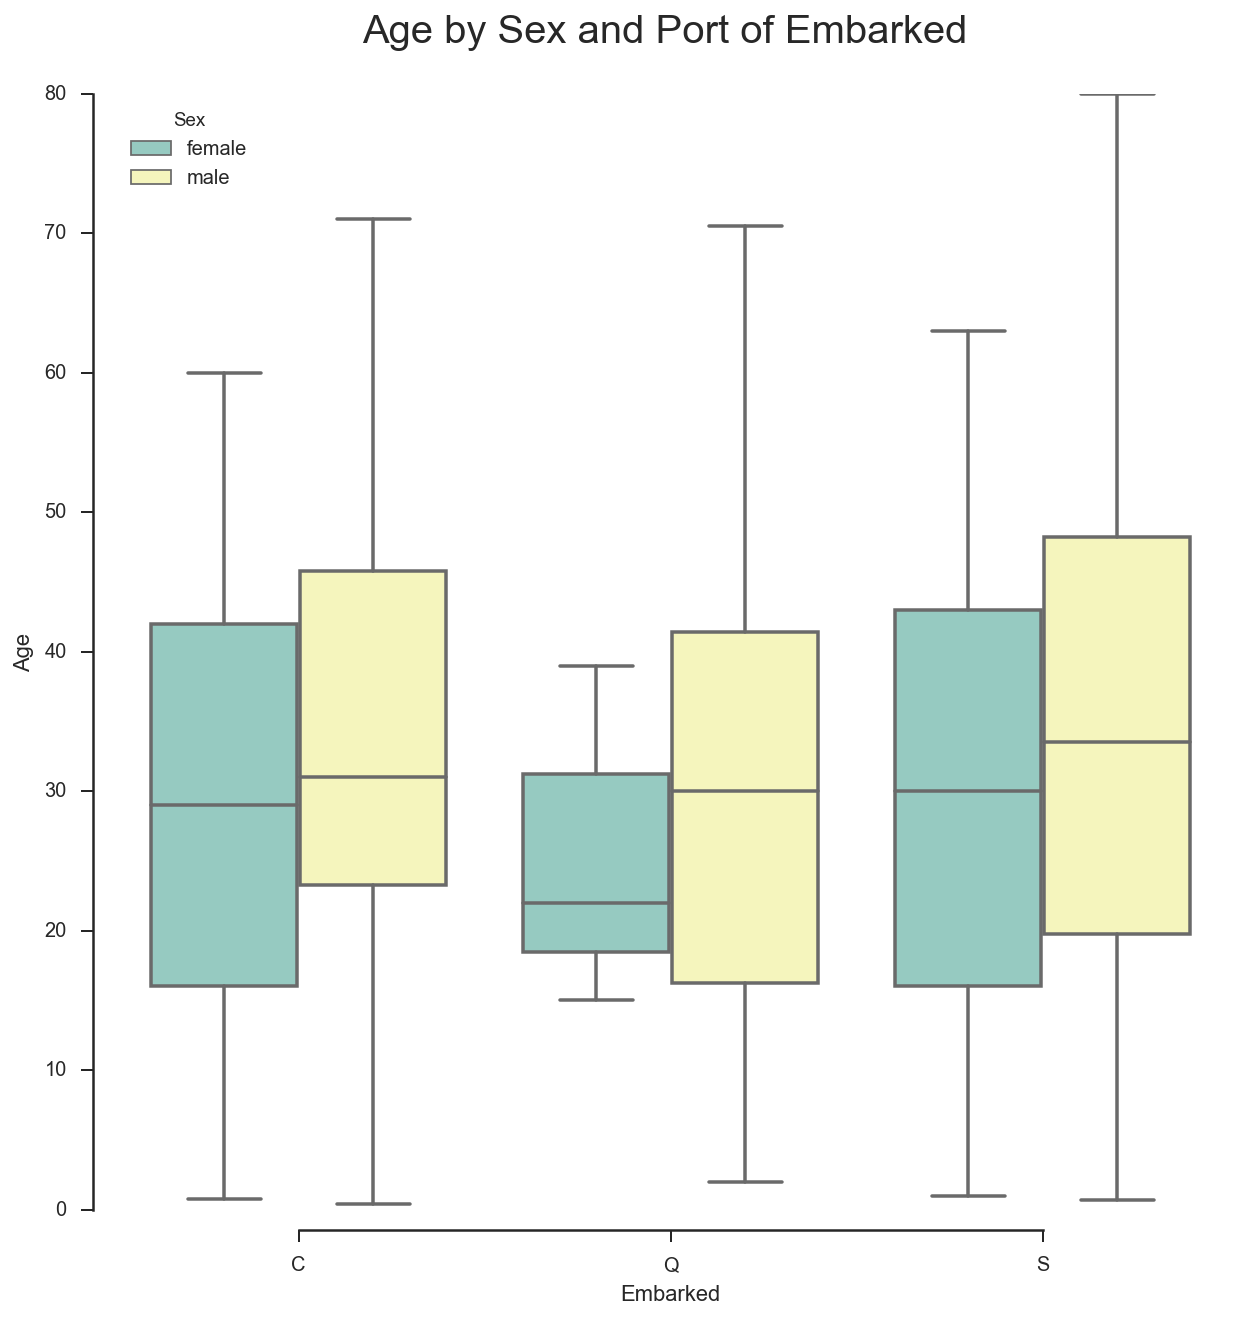

In [45]:
## A graph that doesn't use groupby, but uses a subset
subset_tita = titanic.groupby( ['Sex','Embarked', 'Age']).size().reset_index()

fig = plt.figure(figsize=(10,10))
sns.set(style="ticks")

sns.boxplot(x='Embarked', y="Age", hue="Sex", data=subset_tita, palette="Set3")
sns.despine(offset=10, trim=True)

plt.title('Age by Sex and Port of Embarked \n', fontsize = 20)
plt.show()

In [40]:
# Other group by methods include -- 
# Thanks to DAVID!!
groupby_list = """
gb.filter  gb.get_group  gb.height  gb.last gb.median gb.ngroups    gb.plot       gb.rank       gb.std        gb.transform
gb.aggregate  gb.count      gb.cumprod    gb.dtype      gb.first      gb.groups     gb.hist       gb.max        gb.min        gb.nth        gb.prod       gb.resample   gb.sum        gb.var
gb.apply      gb.cummax     gb.cumsum     gb.fillna     gb.gender     gb.head       gb.indices    gb.mean       gb.name       gb.ohlc       gb.quantile   gb.size       gb.tail       gb.weight
"""

cleaned_list = map(lambda item: item.replace("gb", "").strip(), groupby_list.split(".")[1:])
pd.DataFrame(cleaned_list, columns=["Aggregate Functions"])

,Aggregate Functions
0,filter
1,get_group
2,height
3,last
4,median
5,ngroups
6,plot
7,rank
8,std
9,transform
